In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [171]:

df=pd.read_csv("Amazon Sale Report.csv",low_memory=False)
print(df.head(3))

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   

  Category Size        ASIN Courier Status  Qty currency  Amount    ship-city  \
0      Set    S  B09KXVBD7Z            NaN    0      INR  647.62       MUMBAI   
1    kurta  3XL  B09K3WFS32        Shipped    1      INR  406.00    BENGALURU   
2    kurta   XL  B07WV4JV4D        Shipped    1      INR  329.00  NAVI MUMBAI   

    ship-state  ship-postal-code ship-country  \
0  MAHARASHTRA          4000

In [9]:
df.shape

(128975, 24)

In [29]:
df.nunique()

index                 128975
Order ID              120378
Date                      91
Status                    13
Fulfilment                 2
Sales Channel              2
ship-service-level         2
Style                   1377
SKU                     7195
Category                   9
Size                      11
ASIN                    7190
Courier Status             3
Qty                       10
currency                   1
Amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
promotion-ids           5787
B2B                        2
fulfilled-by               1
Unnamed: 22                1
dtype: int64

In [37]:
df.value_counts(dropna=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [39]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'Qty'}>],
       [<Axes: title={'center': 'Amount'}>,
        <Axes: title={'center': 'ship-postal-code'}>]], dtype=object)

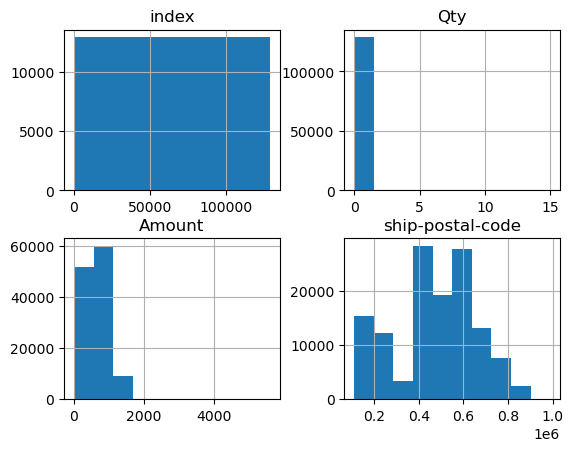

In [41]:
df.hist()

In [51]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

                     index       Qty    Amount  ship-postal-code
index             1.000000  0.010621  0.047571          0.003719
Qty               0.010621  1.000000  0.066900         -0.010179
Amount            0.047571  0.066900  1.000000         -0.038195
ship-postal-code  0.003719 -0.010179 -0.038195          1.000000


index               0.000000
Qty                -0.697678
Amount              0.885481
ship-postal-code   -0.258331
dtype: float64


index               -1.200000
Qty                 60.362580
Amount               3.003753
ship-postal-code    -0.684875
dtype: float64


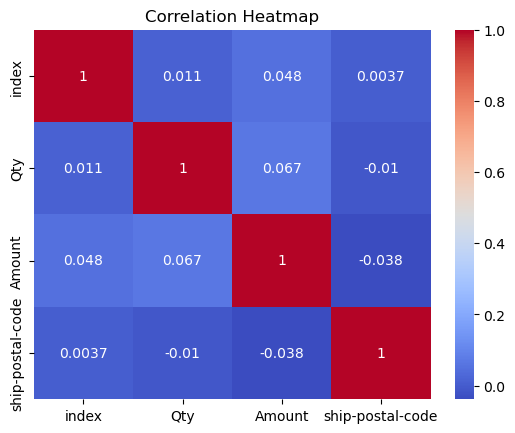

In [205]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)
print("\n")
print(numeric_df.skew())
print("\n")
print(numeric_df.kurt())

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [23]:
df.set_index('index' ,inplace=True)

In [39]:
df.sample(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,,,
66010,405-8023264-0737140,05-18-22,Cancelled,Merchant,Amazon.in,Standard,J0135,J0135-SET-S,Set,S,B08QGMRCHW,NaN,0,INR,562.86,NEW DELHI,DELHI,110077.0,IN,NaN,False,Easy Ship,False
61673,405-9672204-0192307,05-21-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3801,JNE3801-KR-L,kurta,L,B09SDY51NS,Cancelled,0,NaN,NaN,JAMMU,JAMMU & KASHMIR,180010.0,IN,NaN,False,NaN,False


In [75]:
df1=df[['Order ID','Amount','ship-state']]
df2=df[(df['Status'] == 'Shipped') & (df['Amount']<500)]
df2

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,,,
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,INR,363.0,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN
11,171-4638481-6326716,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3500,JNE3500-KR-XS,kurta,XS,B098117DJ3,Shipped,1,INR,364.0,NOIDA,UTTAR PRADESH,201303.0,IN,NaN,False,NaN,NaN
16,406-9379318-6555504,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3721,JNE3721-KR-XXL,kurta,XXL,B099FCT65D,Shipped,1,INR,329.0,JAIPUR,RAJASTHAN,302020.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
17,405-9013803-8009918,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3405,JNE3405-KR-XL,kurta,XL,B081WT6GG7,Shipped,1,INR,399.0,NEW DELHI,DELHI,110074.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128939,407-9521244-5120341,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3707,JNE3707-DR-S,Western Dress,S,B09836XGVQ,Shipped,1,INR,475.0,BENGALURU,KARNATAKA,560035.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128944,404-3730733-2137156,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-M,kurta,M,B08B3VSTFG,Shipped,1,INR,399.0,EDAIKODU,TAMIL NADU,629152.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128952,404-8878574-4524358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3721,JNE3721-KR-M,kurta,M,B099FC9KR1,Shipped,1,INR,301.0,Rishra Hooghly,WEST BENGAL,712249.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [95]:
df.loc[df['Size'] == 'XL', ['Order ID', 'Size', 'Amount']]


,Order ID,Size,Amount
index,,,
2,404-0687676-7273146,XL,329.0
5,404-1490984-4578765,XL,824.0
17,405-9013803-8009918,XL,399.0
31,403-7056319-0979561,XL,499.0
34,404-7774085-3780319,XL,376.0
...,...,...,...
128943,406-2064157-0257152,XL,771.0
128951,404-1385746-5321913,XL,825.0
128961,402-0082204-6323568,XL,771.0


In [101]:
df.iloc[:,2 :5]  # First 5 rows, first 5 columns


,Status,Fulfilment,Sales Channel
index,,,
0,Cancelled,Merchant,Amazon.in
1,Shipped - Delivered to Buyer,Merchant,Amazon.in
2,Shipped,Amazon,Amazon.in
3,Cancelled,Merchant,Amazon.in
4,Shipped,Amazon,Amazon.in
...,...,...,...
128970,Shipped,Amazon,Amazon.in
128971,Shipped,Amazon,Amazon.in
128972,Shipped,Amazon,Amazon.in


In [93]:
df.loc[232,['Style','Amount']]


Style     JNE3781
Amount      406.0
Name: 232, dtype: object

In [13]:
pd.set_option('display.max_columns', None)

In [105]:
# Check if any row contains missing values
df.isnull().any(axis=0)

Order ID              False
Date                  False
Status                False
Fulfilment            False
Sales Channel         False
ship-service-level    False
Style                 False
SKU                   False
Category              False
Size                  False
ASIN                  False
Courier Status         True
Qty                   False
currency               True
Amount                 True
ship-city              True
ship-state             True
ship-postal-code       True
ship-country           True
promotion-ids          True
B2B                   False
fulfilled-by           True
Unnamed: 22            True
dtype: bool

In [111]:
df_cleaned = df.dropna(subset=['Amount'])


In [115]:
df_cleaned = df.dropna(axis=1)
#This is useful if a column is too incomplete (e.g., missing more than 50% of values) to be useful for analysis.
#df_cleaned.info()

In [ ]:
df['Amount'].fillna(0, inplace=True)

In [123]:
# This will return rows with duplicates based on the 'Order ID' column (excluding the first occurrence).
duplicates = df[df.duplicated(subset=['Order ID'], keep=False)]  # keep=False keeps all duplicates.
duplicates

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
index,,,,,,,,,,,,,,,,,,,,,,,
37,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3787,JNE3787-KR-S,kurta,S,B09RKBXM5B,Shipped,1,INR,487.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
38,403-4367956-2849158,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3543,JNE3543-KR-S,kurta,S,B08HHJP41L,Shipped,1,INR,368.0,NEW DELHI,DELHI,110092.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
61,404-2262140-4696366,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE2270,JNE2270-KR-487-A-M,kurta,M,B07H7FZD32,Shipped,1,INR,518.0,NAGPUR,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
62,404-2262140-4696366,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3579,JNE3579-KR-M,kurta,M,B08QGK2BS2,Shipped,1,INR,295.0,NAGPUR,MAHARASHTRA,440022.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
79,408-4069830-3819562,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET288,SET288-KR-NP-XXXL,Set,3XL,B09M6STTBC,Shipped,1,INR,684.0,Kolkata,WEST BENGAL,700048.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128930,407-8519205-5064368,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET324,SET324-KR-NP-XL,Set,XL,B09NQ4QS13,Shipped,1,INR,635.0,VIJAYAWADA,ANDHRA PRADESH,520010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128941,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0118,J0118-TP-XXL,Top,XXL,B08N4QTQHW,Shipped,1,INR,529.0,BENGALURU,KARNATAKA,560102.0,IN,NaN,False,NaN,False
128942,403-3035549-4142738,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-XXL,Top,XXL,B099S8X47K,Shipped,1,INR,518.0,BENGALURU,KARNATAKA,560102.0,IN,NaN,False,NaN,False


In [127]:
# Convert 'Status' column to categorical type
df['Status'] = df['Status'].astype('category')

# Check the data type
print(df['Status'].dtype)  # Output: category


category


In [129]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Convert 'Status' to numerical labels
df['Status_encoded'] = le.fit_transform(df['Status'])

print(df[['Status', 'Status_encoded']].head())


                             Status  Status_encoded
index                                              
0                         Cancelled               0
1      Shipped - Delivered to Buyer               5
2                           Shipped               3
3                         Cancelled               0
4                           Shipped               3


In [147]:
# Fill missing 'Status' values with the mode (most frequent value)
df['Status'].fillna(df['Status'].mode()[0])


index
0                            Cancelled
1         Shipped - Delivered to Buyer
2                              Shipped
3                            Cancelled
4                              Shipped
                      ...             
128970                         Shipped
128971                         Shipped
128972                         Shipped
128973                         Shipped
128974                         Shipped
Name: Status, Length: 128975, dtype: category
Categories (13, object): ['Cancelled', 'Pending', 'Pending - Waiting for Pick Up', 'Shipped', ..., 'Shipped - Rejected by Buyer', 'Shipped - Returned to Seller', 'Shipped - Returning to Seller', 'Shipping']

In [145]:
# Assume we have a column 'Size' with values ['Small', 'Medium', 'Large']
size_mapping = {'S': 1, 'M': 2, 'XL':3, '3XL':4}

# Map values to their corresponding numeric bins
df['Size_numeric'] = df['Size'].map(size_mapping)

print(df[['Size', 'Size_numeric']].head())


      Size  Size_numeric
index                   
0        S           1.0
1      3XL           4.0
2       XL           3.0
3        L           NaN
4      3XL           4.0


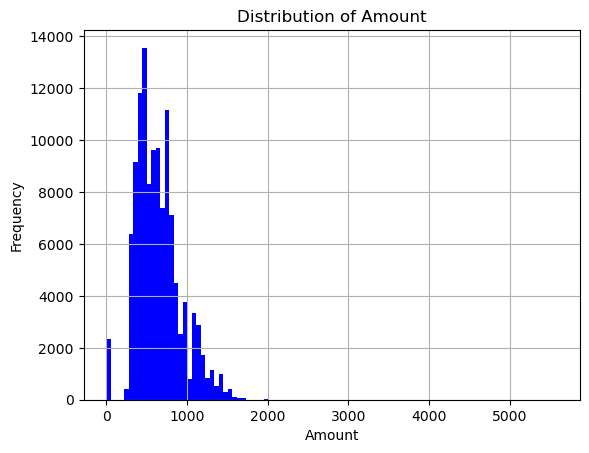

In [165]:
df['Amount'].hist(bins=100, color='blue')
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

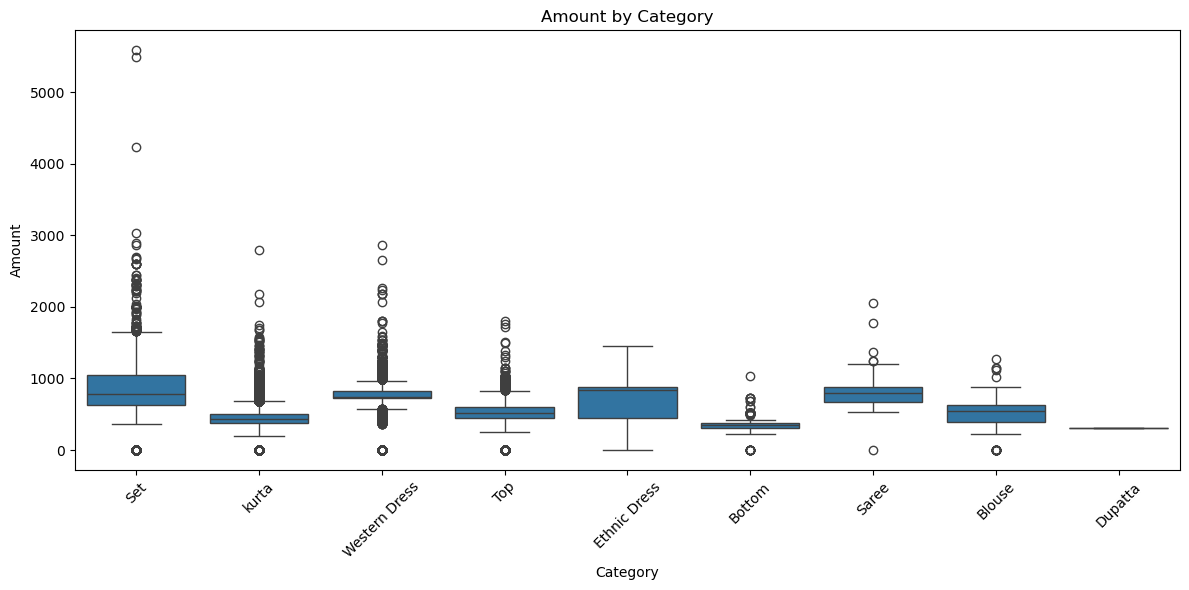

In [175]:
plt.figure(figsize=(12, 6))  # Adjust width and height as needed
sns.boxplot(x='Category', y='Amount', data=df)
plt.title('Amount by Category')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

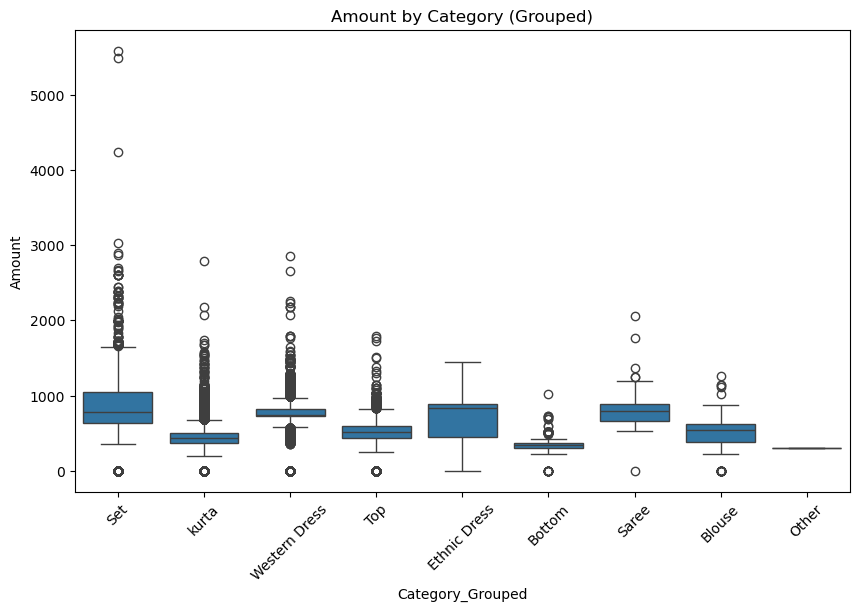

In [177]:
# Group categories with less than N occurrences into "Other"
value_counts = df['Category'].value_counts()
threshold = 10  # Minimum number of occurrences
df['Category_Grouped'] = df['Category'].where(df['Category'].map(value_counts) >= threshold, 'Other')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Category_Grouped', y='Amount', data=df)
plt.title('Amount by Category (Grouped)')
plt.xticks(rotation=45)
plt.show()

In [181]:
df.sample(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Category_Grouped
782,782,404-4568279-0273125,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0301,J0301-TP-XXL,Top,XXL,B099S8X47K,Shipped,1,INR,463.0,FARIDABAD,HARYANA,121003.0,IN,NaN,False,NaN,NaN,Top


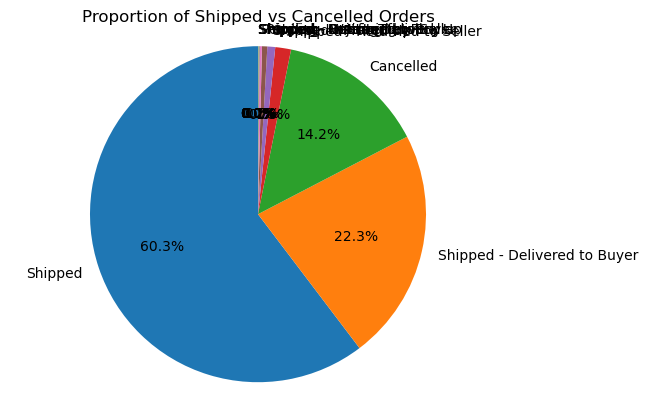

In [193]:
status_counts = df['Status'].value_counts()
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Shipped vs Cancelled Orders')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


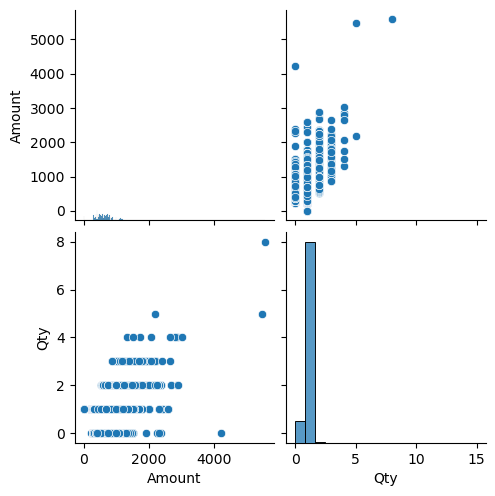

In [199]:
sns.pairplot(df[['Amount', 'Qty', 'Category']])
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_9020\3502839783.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


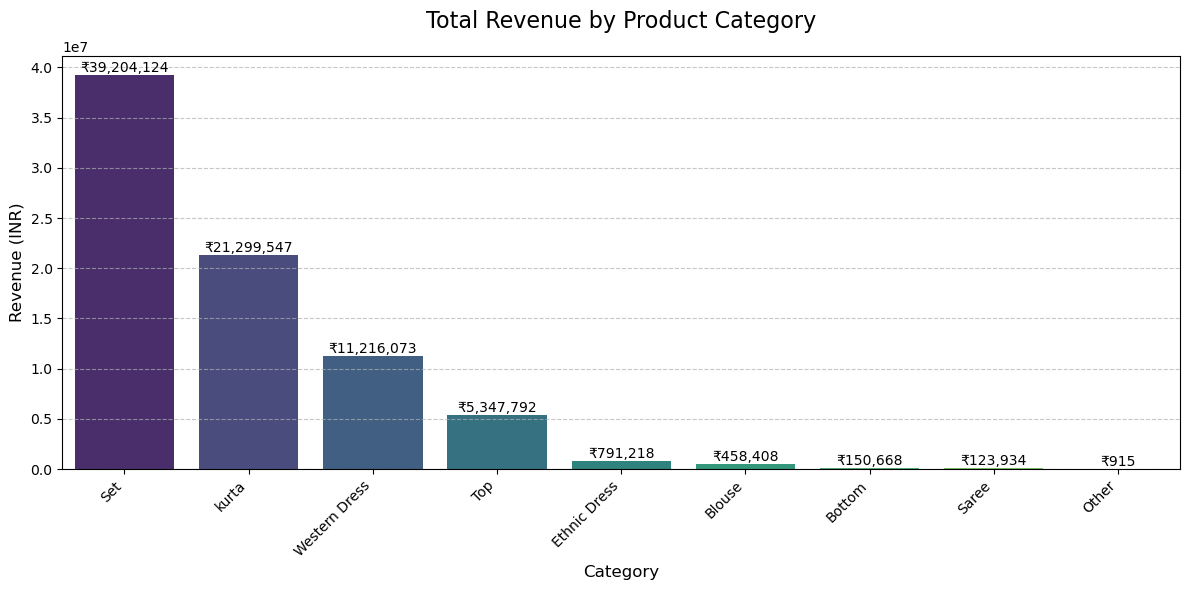

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data
category_revenue = df.groupby('Category_Grouped')['Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=category_revenue.index, 
    y=category_revenue.values,
    palette='viridis'
)
plt.title('Total Revenue by Product Category', fontsize=16, pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Revenue (INR)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels
for i, value in enumerate(category_revenue.values):
    plt.text(i, value, f'₹{value:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

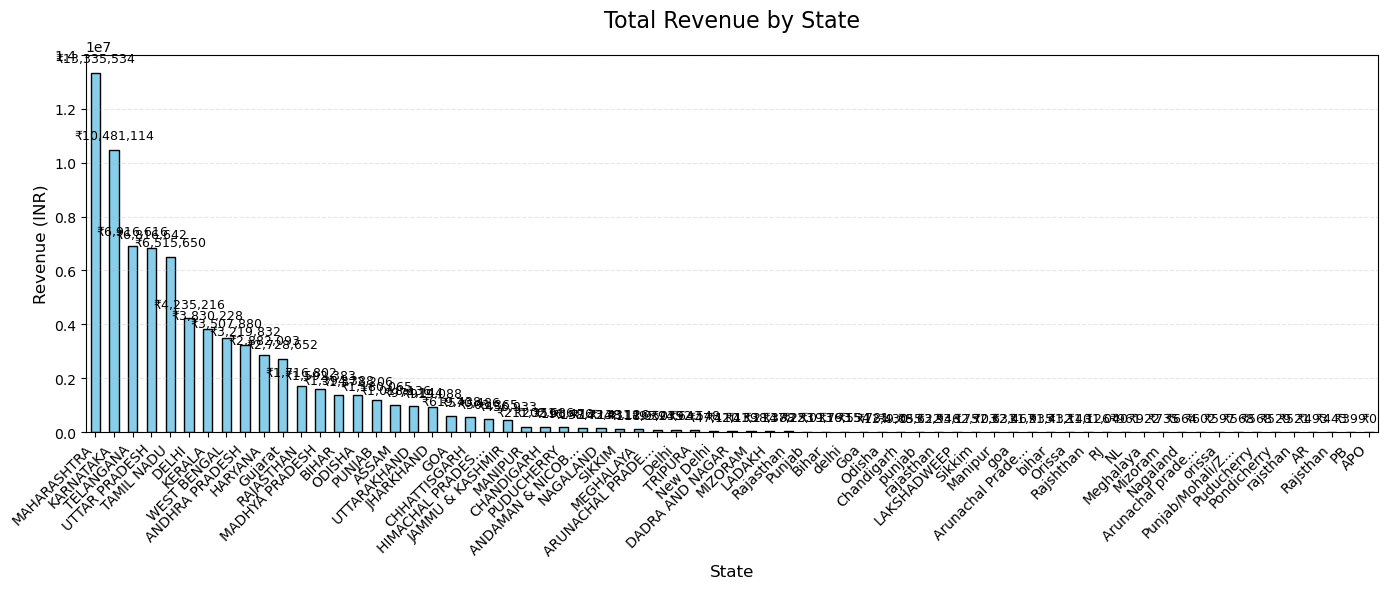

In [223]:
import matplotlib.pyplot as plt

# Aggregate data
state_revenue = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
ax = state_revenue.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize labels and layout
plt.title('Total Revenue by State', fontsize=16, pad=20)
plt.xlabel('State', fontsize=12)
plt.ylabel('Revenue (INR)', fontsize=12)
plt.xticks(
    rotation=45, 
    ha='right', 
    fontsize=10  # Smaller font for better fit
)
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Shorten long state names (optional)
ax.set_xticklabels([label.get_text()[:15] + '...' if len(label.get_text()) > 15 else label.get_text() 
                    for label in ax.get_xticklabels()])

# Add value labels on top of bars (optional)
for p in ax.patches:
    ax.annotate(
        f'₹{p.get_height():,.0f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points',
        fontsize=9
    )

plt.tight_layout()  # Prevent label cutoff
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9020\1906569877.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


<Axes: xlabel='Date'>

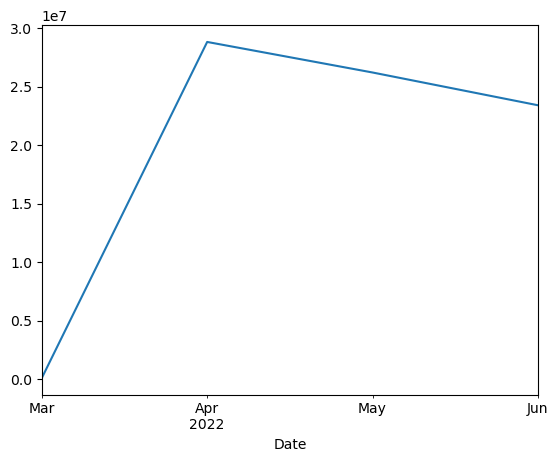

In [225]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_revenue = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_revenue.plot()

In [5]:
# Convert 'Amount' to numeric if not already (handle errors)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# Group by Category and calculate average
grouped_df = df.groupby('Category').agg( 'mean')

# Apply HAVING-like condition (filter after groupby)
filtered_df = grouped_df[grouped_df['avg_amount'] > 500]
# Display result
print(filtered_df)

NameError: name 'df' is not defined

In [159]:
# Order DataFrame
df_orders = pd.DataFrame({
    'Order ID': [1, 2, 3, 4],
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03', '2022-02-01'],
    'Amount': [500, 300, 400, 200]
})
# Shipping DataFrame
df_shipping = pd.DataFrame({
    'Order ID': [1, 2, 3, 5],
    'Ship City': ['New York', 'San Francisco', 'Los Angeles', 'Seattle'],
    'Shipping Method': ['Standard', 'Expedited', 'Standard', 'Expedited']
})
# Perform inner merge (similar to SQL INNER JOIN)
df_merged = pd.merge(df_orders, df_shipping, on='Order ID', how='outer')
print(df_merged)

   Order ID        Date  Amount      Ship City Shipping Method
0         1  2022-01-01   500.0       New York        Standard
1         2  2022-01-02   300.0  San Francisco       Expedited
2         3  2022-01-03   400.0    Los Angeles        Standard
3         4  2022-02-01   200.0            NaN             NaN
4         5         NaN     NaN        Seattle       Expedited


In [155]:
import pandas as pd

# Create two example DataFrames representing orders from different months
df_jan = pd.DataFrame({
    'Order ID': [1, 2, 3],
    'Date': ['2022-01-01', '2022-01-02', '2022-01-03'],
    'Amount': [500, 300, 400],
    'Category': ['Electronics', 'Clothing', 'Books']
})

df_feb = pd.DataFrame({
    'Order ID': [4, 5, 6],
    'Date': ['2022-02-01', '2022-02-02', '2022-02-03'],
    'Amount': [200, 600, 100],
    'Category': ['Books', 'Electronics', 'Clothing']
})

# Concatenate both DataFrames along rows (axis=0)
df_combined = pd.concat([df_jan, df_feb], axis=0, ignore_index=True)

print(df_combined)




   Order ID        Date  Amount     Category
0         1  2022-01-01     500  Electronics
1         2  2022-01-02     300     Clothing
2         3  2022-01-03     400        Books
3         4  2022-02-01     200        Books
4         5  2022-02-02     600  Electronics
5         6  2022-02-03     100     Clothing
   Order ID        Date  Amount     Category  Order ID        Date  Amount  \
0         1  2022-01-01     500  Electronics         4  2022-02-01     200   
1         2  2022-01-02     300     Clothing         5  2022-02-02     600   
2         3  2022-01-03     400        Books         6  2022-02-03     100   

      Category  
0        Books  
1  Electronics  
2     Clothing  


In [13]:
import pandas as pd
import numpy as np

# Simulate a DataFrame with common data issues for an Indian stock market dataset
np.random.seed(42)

data = {
    'Stock Name': ['TCS', 'Infosys', 'Reliance', 'HDFC', 'Wipro', 'Tata Steel', 'HCL', 'Adani', 'Bajaj Fin', 'ITC'] * 3,
    'Date': ['2023-05-01', '2023-05-02', np.nan, '2023-05-04', 'wrong_date', '2023-05-06', 
             '2023-05-07', '2023-05-08', '2023-05-09', '2023-05-10'] * 3,
    'Open': np.random.choice([1000, 1500, 2000, 'NaN', 'open'], size=30),
    'Close': np.random.choice([1050, 1550, 2050, None, 'close'], size=30),
    'Volume': np.random.choice([100000, 200000, 300000, np.nan, 'one lakh'], size=30),
    'P/E Ratio': np.random.choice([15.5, 20.3, 25.7, np.nan, 'high'], size=30),
    'Dividend Yield': np.random.choice([1.5, 2.0, 2.5, None, 'low'], size=30),
    '52 Week High': np.random.choice([2100, 2200, 2300, 'N/A'], size=30),
    '52 Week Low': np.random.choice([900, 950, 1000, 'low'], size=30),
    'Market Cap': np.random.choice([1e12, 2e12, 'unknown', None], size=30)
}

# Create DataFrame
df = pd.DataFrame(data)
df.head(30)

,Stock Name,Date,Open,Close,Volume,P/E Ratio,Dividend Yield,52 Week High,52 Week Low,Market Cap
0,TCS,2023-05-01,NaN,2050,200000,25.7,2.0,2100,low,2000000000000.0
1,Infosys,2023-05-02,open,None,nan,15.5,None,2300,900,2000000000000.0
2,Reliance,NaN,2000,None,one lakh,25.7,low,2200,low,1000000000000.0
3,HDFC,2023-05-04,open,1050,200000,25.7,2.5,2100,900,None
4,Wipro,wrong_date,open,2050,200000,15.5,1.5,2100,950,2000000000000.0
5,Tata Steel,2023-05-06,1500,close,nan,25.7,None,2100,900,None
6,HCL,2023-05-07,2000,2050,200000,high,low,2300,950,2000000000000.0
7,Adani,2023-05-08,2000,close,200000,20.3,None,2200,low,None
8,Bajaj Fin,2023-05-09,2000,1050,nan,20.3,low,2100,low,unknown
9,ITC,2023-05-10,open,1550,nan,15.5,low,N/A,950,None


In [3]:
import pandas as pd
import numpy as np

# Creating a sample DataFrame with missing values
data = {
    'School ID': [101, 102, 103, np.nan, 105, 106, 107, 108],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Henry'],
    'Address': ['123 Main St', '456 Oak Ave', '789 Pine Ln', '101 Elm St', np.nan, '222 Maple Rd', '444 Cedar Blvd', '555 Birch Dr'],
    'City': ['Los Angeles', 'New York', 'Houston', 'Los Angeles', 'Miami', np.nan, 'Houston', 'New York'],
    'Subject': ['Math', 'English', 'Science', 'Math', 'History', 'Math', 'Science', 'English'],
    'Marks': [85, 92, 78, 89, np.nan, 95, 80, 88],
    'Rank': [2, 1, 4, 3, 8, 1, 5, 3],
    'Grade': ['B', 'A', 'C', 'B', 'D', 'A', 'C', 'B']
}

df = pd.DataFrame(data)
print("Sample DataFrame:")
print(df)

Sample DataFrame:
   School ID     Name         Address         City  Subject  Marks  Rank Grade
0      101.0    Alice     123 Main St  Los Angeles     Math   85.0     2     B
1      102.0      Bob     456 Oak Ave     New York  English   92.0     1     A
2      103.0  Charlie     789 Pine Ln      Houston  Science   78.0     4     C
3        NaN    David      101 Elm St  Los Angeles     Math   89.0     3     B
4      105.0      Eva             NaN        Miami  History    NaN     8     D
5      106.0    Frank    222 Maple Rd          NaN     Math   95.0     1     A
6      107.0    Grace  444 Cedar Blvd      Houston  Science   80.0     5     C
7      108.0    Henry    555 Birch Dr     New York  English   88.0     3     B
